In [1]:
from signaturizer import Signaturizer
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import joblib
from importlib import resources
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.backends.backend_pdf
from matplotlib import pyplot as plt
import io
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*X does not have valid feature names*', )
warnings.filterwarnings('ignore', '.*signatures are NaN*', )
warnings.filterwarnings('ignore', '.*tensorflow:6*', )

In [2]:
FROM='models/'

In [3]:
def Feature_Signaturizer(dat):
    sig_df=pd.DataFrame()
    desc=['A','B','C','D','E']
    for dsc in tqdm(desc):
        for i in range(1,6):
            sign = Signaturizer(dsc+str(i),)
            results = sign.predict(dat)
            df=pd.DataFrame(results.signature)
            for clm in list(df.columns):
                df=df.rename(columns={clm:dsc+str(i)+'_'+str(clm)})
            sig_df=pd.concat([sig_df,df],axis = 1)
    sig_df = handle_missing_values(sig_df)
    res = pd.DataFrame()
    res['smiles'] = dat
    res = pd.concat([res,sig_df],axis = 1)
    return res
def handle_missing_values(data):
    print('Handlling Missing values')
    data = data.replace([np.inf, -np.inf, "", " "], np.nan)
    data = data.replace(["", " "], np.nan)
    for i in data.columns:
        data[i] = data[i].fillna(data[i].mean())
    return data

In [4]:
class model_epigenetic:
    def __init__(self,test):        
        self.test = test
    def extract_feature(self,data):        
        F_names=pd.read_csv(FROM+'features/Epigenetics_features.csv')
        features=F_names.iloc[:,0].tolist()
        return data[features]
    def get_labels(self,pred_test): #Getting discrete labels from probability values    
        test_pred = []        
        for i in range(pred_test.shape[0]):
            if(pred_test[i][0]>pred_test[i][1]):
                test_pred.append(0)
            else:
                test_pred.append(1)
        return test_pred 
       
    def test_model(self):
        test = self.test
        test_filtered = self.extract_feature(test.drop(['smiles'],axis=1))
        model = joblib.load(FROM+'models/Epigenetic_svm.pkl')
        probs = model.predict_proba(test_filtered)    
        preds = self.get_labels(probs)
        return probs,preds

In [5]:
class model_apoptosis:
    def __init__(self,test):        
        self.test = test
    def extract_feature(self,data):        
        F_names=pd.read_csv(FROM+'features/Apoptosis_features.csv')
        features=F_names.iloc[:,0].tolist()
        return data[features]
    def get_labels(self,pred_test): #Getting discrete labels from probability values    
        test_pred = []        
        for i in range(pred_test.shape[0]):
            if(pred_test[i][0]>pred_test[i][1]):
                test_pred.append(0)
            else:
                test_pred.append(1)
        return test_pred 
       
    def test_model(self):
        test = self.test
        test_filtered = self.extract_feature(test.drop(['smiles'],axis=1))
        model = joblib.load(FROM+'models/Apoptosis_KNN.sav')
        probs = model.predict_proba(test_filtered)    
        preds = self.get_labels(probs)
        return probs,preds

In [6]:
class model_oxidative:
    def __init__(self,test):        
        self.test = test
    def extract_feature(self,data):        
        F_names=pd.read_csv(FROM+'features/Oxidative_features.csv')
        features=F_names.iloc[:,0].tolist()
        return data[features]
    def get_labels(self,pred_test): #Getting discrete labels from probability values    
        test_pred = []        
        for i in range(pred_test.shape[0]):
            if(pred_test[i][0]>pred_test[i][1]):
                test_pred.append(0)
            else:
                test_pred.append(1)
        return test_pred 
       
    def test_model(self):
        test = self.test
        test_filtered = self.extract_feature(test.drop(['smiles'],axis=1))
        model = joblib.load(FROM+'models/Oxidative_mlp.pkl')
        probs = model.predict_proba(test_filtered)    
        preds = self.get_labels(probs)
        return probs,preds

In [7]:
class model_ginstability:
    def __init__(self,test):        
        self.test = test
    def extract_feature(self,data):        
        F_names=pd.read_csv(FROM+'features/Genomic_Instability_features.csv')
        features=F_names.iloc[:,0].tolist()
        return data[features]
    def get_labels(self,pred_test): #Getting discrete labels from probability values    
        test_pred = []        
        for i in range(pred_test.shape[0]):
            if(pred_test[i][0]>pred_test[i][1]):
                test_pred.append(0)
            else:
                test_pred.append(1)
        return test_pred 
       
    def test_model(self):
        test = self.test
        test_filtered = self.extract_feature(test.drop(['smiles'],axis=1))
        model = joblib.load(FROM+'models/Genomic_Instabilty_RF.sav')
        probs = model.predict_proba(test_filtered)    
        preds = self.get_labels(probs)
        return probs,preds

In [8]:
class model_proliferation:
    def __init__(self,test):        
        self.test = test
    def extract_feature(self,data):        
        F_names=pd.read_csv(FROM+'features/Proliferation_features.csv')
        features=F_names.iloc[:,0].tolist()
        return data[features]
    def get_labels(self,pred_test): #Getting discrete labels from probability values    
        test_pred = []        
        for i in range(pred_test.shape[0]):
            if(pred_test[i][0]>pred_test[i][1]):
                test_pred.append(0)
            else:
                test_pred.append(1)
        return test_pred 
       
    def test_model(self):
        test = self.test
        test_filtered = self.extract_feature(test.drop(['smiles'],axis=1))
        model = joblib.load(FROM+'models/Proliferation_RF.pkl')
        probs = model.predict_proba(test_filtered)    
        preds = self.get_labels(probs)
        return probs,preds

In [9]:
class model_electrophile:
    def __init__(self,test):        
        self.test = test
    def extract_feature(self,data):        
        F_names=pd.read_csv(FROM+'features/Electrophile_features.csv')
        features=F_names.iloc[:,0].tolist()
        return data[features]
    def get_labels(self,pred_test): #Getting discrete labels from probability values    
        test_pred = []        
        for i in range(pred_test.shape[0]):
            if(pred_test[i][0]>pred_test[i][1]):
                test_pred.append(0)
            else:
                test_pred.append(1)
        return test_pred 
       
    def test_model(self):
        test = self.test
        test_filtered = self.extract_feature(test.drop(['smiles'],axis=1))
        model = joblib.load(FROM+'models/Electrophile_MLP.pkl')
        probs = model.predict_proba(test_filtered)    
        preds = self.get_labels(probs)
        return probs,preds

In [11]:
class model_ensemble:
    def __init__(self,test,exp):        
        self.test = test
        self.exp = exp
    def extract_feature(self,data):        
        data=data.rename(columns={'GInstability_1':'GI','Apoptosis_1':'Apo','Electrophile_1':'Elec','Proliferation_1':'Prf','Oxidative_1':'Oxd','Epigenetics_1':'Epig'})
        return data.apply(pd.to_numeric)
    def get_labels(self,pred_test): #Getting discrete labels from probability values    
        test_pred = []        
        for i in range(pred_test.shape[0]):
            if(pred_test[i][0]>pred_test[i][1]):
                test_pred.append(0)
            else:
                test_pred.append(1)
        return test_pred 
    def explainibility(self,testdata,smi_list,mdl_id):
        pdf = []
        for r in range(len(mdl_id)):
            if mdl_id[r] == 'Unresolved':
                continue
            else:
                ID = mdl_id[r].split('_')[0].split('l')[-1]
                traindata = pd.read_csv(FROM+'features/ensemble/Ensemble-model_KFold'+ID+'train-data.csv')
                model_ensemble = joblib.load(FROM+'models/ensemble/Ensmb_GBC_KFold'+ID+'.sav')
                explainer = LimeTabularExplainer(np.array(traindata),mode='classification', feature_names=traindata.columns)
                explanation = explainer.explain_instance(testdata.values[r], model_ensemble.predict_proba)
                fig=explanation.as_pyplot_figure(label=1) 
                fig.suptitle(smi_list[r],fontweight ="bold",fontsize=8,ha="center",va='top')
                matplotlib.figure.Figure.set_figwidth(fig,15,forward=True)
                pdf.append(fig)
        return pdf
    def Voting(self,Rs):
        Epred=[]
        Eprob1=[]
        Eprob0=[]
        Best_mdl=[]
        Val1=Rs.filter(regex='_pred$').apply(lambda row: row[row == 1].index, axis=1)
        Val0=Rs.filter(regex='_pred$').apply(lambda row: row[row == 0].index, axis=1)
        for r in range(len(Rs)):
            if len(Val1[r])>len(Val0[r]):
                Epred.append(1)
                support_1=[]
                support_0=[]
                for c in Val1[r]:
                    c=c.split('_')[0]
                    support_1.append(c+'_1')
                    support_0.append(c+'_0')
                Eprob1.append(Rs[support_1].iloc[r].mean())
                Eprob0.append(Rs[support_0].iloc[r].mean())
                Best_mdl.append(Rs[support_1].iloc[r].sort_values(ascending=False).index[0])
            elif len(Val1[r])<len(Val0[r]):
                Epred.append(0)
                support_1=[]
                support_0=[]
                for c in Val0[r]:
                    c=c.split('_')[0]
                    support_1.append(c+'_1')
                    support_0.append(c+'_0')
                Eprob1.append(Rs[support_1].iloc[r].mean())
                Eprob0.append(Rs[support_0].iloc[r].mean())
                Best_mdl.append(Rs[support_1].iloc[r].sort_values(ascending=True).index[0])
            else:
                Epred.append('Unresolved')
                Eprob1.append('Unresolved')
                Eprob0.append('Unresolved')
                Best_mdl.append('Unresolved')
        return pd.DataFrame({'Ensemble_0':Eprob0,'Ensemble_1':Eprob1,'Ensemble_preds':Epred}),Best_mdl

    def test_model(self):
        test = self.test
        exp = self.exp
        test_filtered = self.extract_feature(test.filter(regex='_1$'))
        Ensmbl=pd.DataFrame()
        for m in range(20):
            model = joblib.load(FROM+'models/ensemble/Ensmb_GBC_KFold'+str(m)+'.sav')
            probs = model.predict_proba(test_filtered)    
            preds = self.get_labels(probs)
            Ensmbl['Model'+str(m)+'_0']=probs[:,0]
            Ensmbl['Model'+str(m)+'_1']=probs[:,1]
            Ensmbl['Model'+str(m)+'_pred']=preds
        out,LM_mdls=self.Voting(Ensmbl)
        if exp == True:
            exp_fig = self.explainibility(test_filtered,test['smiles'],LM_mdls)
            return out,exp_fig
        else:
            return out




In [12]:
def Individual_predictions(Sig_data,exp):   
    predictions = pd.DataFrame(columns=['smiles','Epigenetics_0','Epigenetics_1','Epigenetics_preds',
    'Oxidative_0','Oxidative_1','Oxidative_preds','GInstability_0','GInstability_1','GInstability_preds',
    'Apoptosis_0','Apoptosis_1','Apoptosis_preds','Proliferation_0','Proliferation_1','Proliferation_preds',
    'Electrophile_0','Electrophile_1','Electrophile_preds'])
    predictions['smiles'] = Sig_data['smiles']
    m1 = model_epigenetic(Sig_data)
    m2 = model_oxidative(Sig_data)
    m3 = model_ginstability(Sig_data)
    m4 = model_electrophile(Sig_data)
    m5 = model_proliferation(Sig_data)   
    m6 = model_apoptosis(Sig_data)   
    probs,preds = m1.test_model()
    predictions['Epigenetics_0'] = probs[:,0]
    predictions['Epigenetics_1'] = probs[:,1]
    predictions['Epigenetics_preds'] = preds    
    probs,preds = m2.test_model()
    predictions['Oxidative_0'] = probs[:,0]
    predictions['Oxidative_1'] = probs[:,1]
    predictions['Oxidative_preds'] = preds    
    probs,preds = m3.test_model()    
    predictions['GInstability_0'] = probs[:,0]
    predictions['GInstability_1'] = probs[:,1]
    predictions['GInstability_preds'] = preds    
    probs,preds = m5.test_model()    
    predictions['Proliferation_0'] = probs[:,0]
    predictions['Proliferation_1'] = probs[:,1]
    predictions['Proliferation_preds'] = preds      
    probs,preds = m6.test_model()
    predictions['Apoptosis_0'] = probs[:,0]
    predictions['Apoptosis_1'] = probs[:,1]
    predictions['Apoptosis_preds'] = preds        
    probs,preds = m4.test_model() 
    predictions['Electrophile_0'] = probs[:,0]
    predictions['Electrophile_1'] = probs[:,1]
    predictions['Electrophile_preds'] = preds
    print('Compiling the results !!')
    m7 = model_ensemble(predictions,exp)
    if exp == True:
        votout , figures = m7.test_model() 
        predictions['Ensemble_0'] = votout['Ensemble_0']
        predictions['Ensemble_1'] = votout['Ensemble_1']
        predictions['Ensemble_preds'] = votout['Ensemble_preds']
        return predictions,figures
    else:
        votout = m7.test_model() 
        predictions['Ensemble_0'] = votout['Ensemble_0']
        predictions['Ensemble_1'] = votout['Ensemble_1']
        predictions['Ensemble_preds'] = votout['Ensemble_preds']
        return predictions
    

In [13]:
def Ensemble_mk(smi_list,explainability=False):
    print('Performing Descriptor calculations')
    Feature_data = pd.DataFrame()
    Feature_data['smiles'] = smi_list
    Sig_Carcin=Feature_Signaturizer(smi_list)
    if explainability == True:
        Final_out,exp_figures =Individual_predictions(Sig_Carcin,True)
        return Final_out,exp_figures
    else:
        Final_out = Individual_predictions(Sig_Carcin,False)
        return Final_out

In [17]:
Ensemble_mk(['ClCC=C','C=CCOC(=O)CC(C)C'])

Performing Descriptor calculations


100%|██████████| 5/5 [00:27<00:00,  5.55s/it]


Handlling Missing values
Compiling the results !!


,smiles,Epigenetics_0,Epigenetics_1,Epigenetics_preds,Oxidative_0,Oxidative_1,Oxidative_preds,GInstability_0,GInstability_1,GInstability_preds,...,Apoptosis_preds,Proliferation_0,Proliferation_1,Proliferation_preds,Electrophile_0,Electrophile_1,Electrophile_preds,Ensemble_0,Ensemble_1,Ensemble_preds
0,ClCC=C,0.203237,0.796763,1,0.999808,1.919288e-04,0,0.509551,0.490449,0,...,0,0.592451,0.407549,0,0.298295,0.701705,1,0.346927,0.653073,1
1,C=CCOC(=O)CC(C)C,0.542730,0.457270,0,1.000000,2.634745e-07,0,0.909461,0.090539,0,...,0,0.552350,0.447650,0,0.066306,0.933694,1,0.411490,0.588510,1


Performing Descriptor calculations


100%|██████████| 5/5 [00:28<00:00,  5.65s/it]


Handlling Missing values
Compiling the results !!


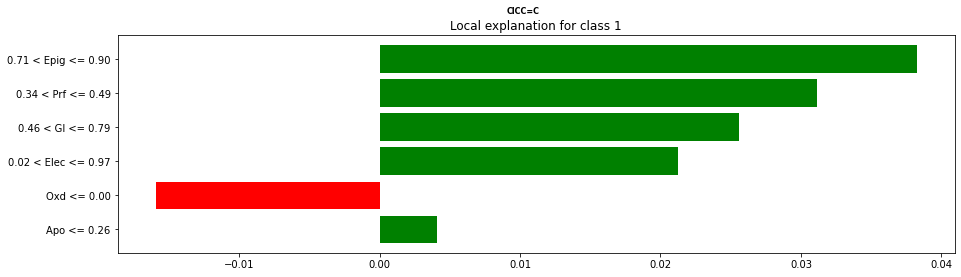

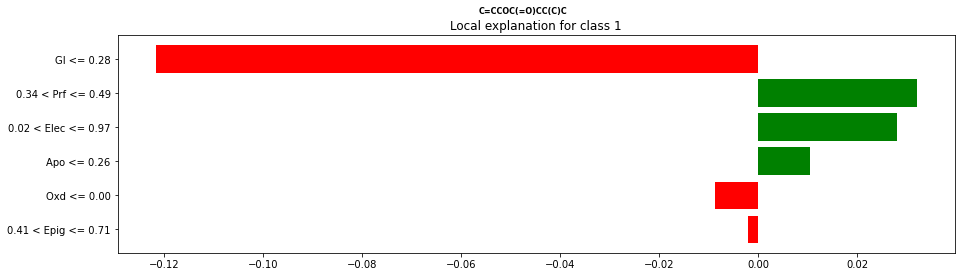

In [19]:
result,explaination = Ensemble_mk(['ClCC=C','C=CCOC(=O)CC(C)C'],explainability=True)

In [ ]:
#save pdf
pdf = PdfPages("Ensmble-Result.pdf")
for fig in explaination:
	fig.savefig(pdf, format='pdf')
pdf.close()